# Автоматическое дифференцирование

In [1]:
import torch
from torch import autograd

In [2]:
x = torch.arange(4).type(torch.float)
print(x)

tensor([0., 1., 2., 3.])


## Присоединение градиента к `x`

In [9]:
# Градиент не подключен
x.requires_grad

True

In [10]:
x.grad

In [11]:
x.requires_grad_()

tensor([0., 1., 2., 3.], requires_grad=True)

In [ ]:
x.grad

None


In [6]:
# Градиент подключен
x.requires_grad

True

In [19]:
x.detach().requires_grad

False

In [20]:
# Градиенты хранятся в свойстве grad самого тензора
x.grad

## Forward

In [26]:
a = x.dot(x.T)
b = 2 * a
print(a)
print(b)


tensor(14., grad_fn=<DotBackward0>)
tensor(28., grad_fn=<MulBackward0>)


In [27]:
y = 2 * x.dot(x.T)
y2 = 2 * x.dot(x.T)

In [28]:
y

tensor(28., grad_fn=<MulBackward0>)

## Backward

In [29]:
y.backward()

In [30]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [31]:
# Проверка
4 * x == x.grad

tensor([True, True, True, True])

## no_grad
функция `no_grad` позводяет отключить вычисление градиентов для части кода

In [32]:
y = 2 * x.dot(x)
print(y.grad_fn)
with torch.no_grad():
    y = 2 * x.dot(x)
    print(y.grad_fn)

None


In [33]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [34]:
y = 2 * x.dot(x)
y.backward()
print(x.grad)
with torch.no_grad():
    y = 2 * x.dot(x)
    y.backward()
    print(x.grad)

tensor([ 0.,  8., 16., 24.])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Гибкий граф

In [35]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c            

In [42]:
a = torch.randn(1).requires_grad_()
d = f(a)
d.backward()

In [43]:
d

tensor([-131085.1875], grad_fn=<MulBackward0>)

In [44]:
a

tensor([-0.6401], requires_grad=True)

In [45]:
a.grad

tensor([204800.])

## Практика

In [47]:
from matplotlib import pyplot as plt

In [49]:
X = [w / 100.0 for w in range(-1000, 1000, 1)]
X[:5]

[-10.0, -9.99, -9.98, -9.97, -9.96]

In [50]:
Y = []
Y_der = []

In [52]:
for x in X:
    xt = torch.Tensor((x,))
    xt.requires_grad_()
    y = torch.sin(xt) * xt
    y.backward()
    Y.append(y.item())
    Y_der.append(xt.grad.item())

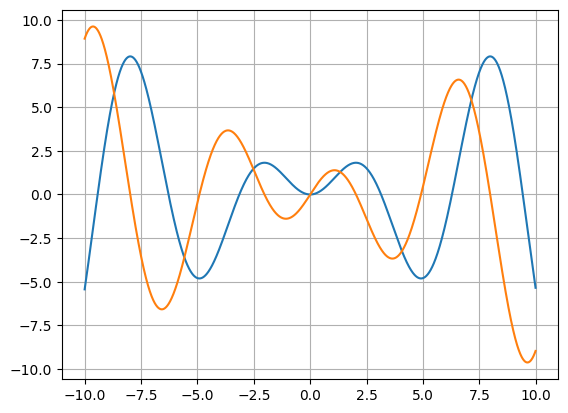

In [55]:
plt.plot(X, Y)
plt.plot(X, Y_der)
plt.grid()
plt.show()

In [72]:
import seaborn as sns

In [87]:
def f(x):
    return torch.sin(x) * x 

In [88]:
x = torch.linspace(-10, 10, 1000).requires_grad_()

In [89]:
y = f(x)

In [90]:
y.backward(torch.ones_like(y))
dx = x.grad

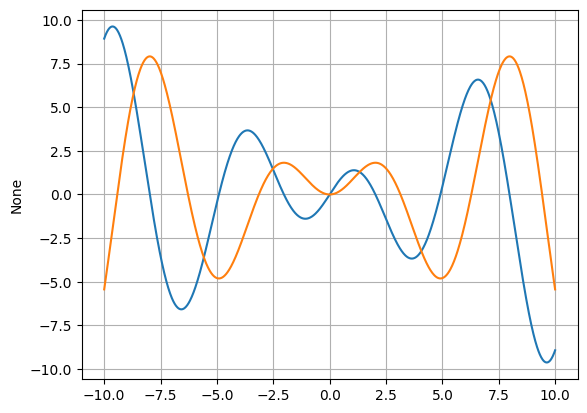

In [91]:
sns.lineplot(x = x.detach().numpy(), y = dx)
sns.lineplot(x = x.detach().numpy(), y = y.detach().numpy())
plt.grid()

In [94]:
x = torch.linspace(-10, 10, 1000).requires_grad_()
y = f(x)

y2 = y.sum()
y2.backward()
dx = x.grad

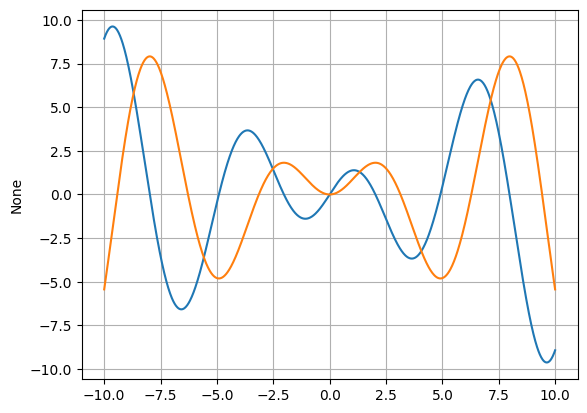

In [95]:
sns.lineplot(x = x.detach().numpy(), y = dx)
sns.lineplot(x = x.detach().numpy(), y = y.detach().numpy())
plt.grid()